## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [16]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error

housing = fetch_california_housing()
#boston = datasets.load_boston()
X = pd.DataFrame(housing.data, columns = housing.feature_names)
y = pd.DataFrame(housing.target, columns = ['MEDV'])

In [2]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [3]:
y.head()

,MEDV
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [4]:
# Ver se tem 0, se tem duplicadas e Nan.
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [5]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MEDV    20640 non-null  float64
dtypes: float64(1)
memory usage: 161.4 KB


In [6]:
X.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [7]:
y.isnull().sum()

MEDV    0
dtype: int64

In [8]:
X.drop_duplicates()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


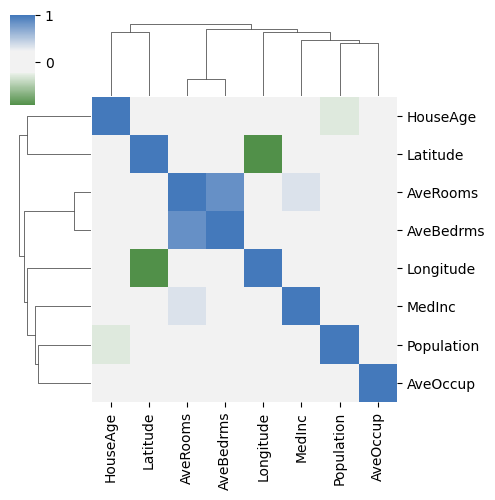

In [9]:
cmap = sns.diverging_palette(h_neg=125
                             , h_pos=250
                             , as_cmap=True
                             , sep = 60
                             , center = 'light')

sns.clustermap(X.corr(), figsize=(5, 5), center = 0, cmap=cmap)

In [10]:
# Como X e y ja estão separados entre a variavel Target e o resto, não precisamos aplicar o .drop( [])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [11]:
regr_1 = DecisionTreeRegressor(max_depth=8)

regr_1.fit(X_train, y_train)

R_sqr1 = regr_1.score(X_test, y_test)
R_sqr1

0.6985682922899202

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [13]:
path = regr_1.cost_complexity_pruning_path(X_train, y_train)

In [14]:
path

{'ccp_alphas': array([0.00000000e+00, 1.18441999e-06, 1.63086010e-06, 3.83752076e-06,
        5.13095930e-06, 5.70100821e-06, 7.00789037e-06, 7.70985604e-06,
        1.08527132e-05, 1.15356220e-05, 1.35195240e-05, 1.39467331e-05,
        1.40056765e-05, 2.13215209e-05, 2.36056923e-05, 3.03488834e-05,
        3.26997768e-05, 3.42429796e-05, 3.42548507e-05, 3.63667463e-05,
        4.14774585e-05, 4.38096161e-05, 4.87787403e-05, 5.11841085e-05,
        5.64381626e-05, 6.36666720e-05, 6.86784791e-05, 7.50071511e-05,
        7.99501806e-05, 8.16396706e-05, 9.00671446e-05, 9.00886094e-05,
        9.09073966e-05, 9.16718377e-05, 9.31179923e-05, 9.35148045e-05,
        1.00559928e-04, 1.00827447e-04, 1.03740316e-04, 1.10861374e-04,
        1.11075398e-04, 1.12437248e-04, 1.14149604e-04, 1.14679503e-04,
        1.19775799e-04, 1.26005341e-04, 1.27455187e-04, 1.29631799e-04,
        1.35372092e-04, 1.39224979e-04, 1.43545228e-04, 1.54103037e-04,
        1.55883346e-04, 1.59016624e-04, 1.68514507

Text(0, 0.5, 'Impureza total das folhas')

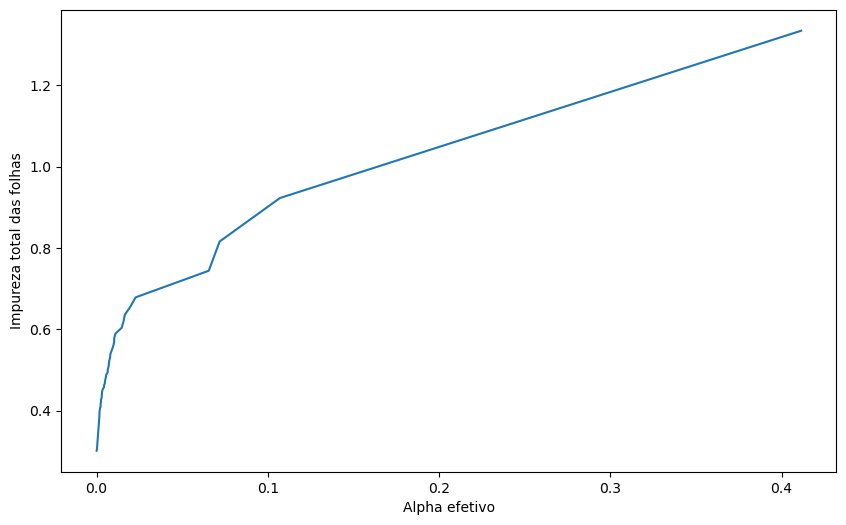

In [17]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

### 3. Para cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [18]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [22]:
import sklearn.metrics as metrics

In [24]:
mse_values = []

for clf in clfs:
  mse = mean_squared_error(y_test, clf.predict(X_test))

  # Armazenar o valor de MSE na lista
  mse_values.append(mse)

In [25]:
print(mse_values)

[0.5085982355174096, 0.5066744792796277, 0.5057153497222253, 0.5032124251965321, 0.5025244337758206, 0.5019001794492297, 0.5014988176914028, 0.5006955575495291, 0.4967745484240995, 0.49597485447792317, 0.49564617429660957, 0.4960060363988808, 0.49598327266926306, 0.4887984132771357, 0.4865507103235036, 0.484117174478038, 0.48160421827551975, 0.48075194995873405, 0.48079233745645844, 0.4791864345812778, 0.4757758232426186, 0.47484224286773413, 0.4677761085889645, 0.4661192125195094, 0.46303894292260855, 0.45703733468918123, 0.4540504073299326, 0.45056592978831733, 0.4492521128757599, 0.44758512472130024, 0.444008028061457, 0.444008028061457, 0.4434574494178328, 0.44254900633126915, 0.44237790630886165, 0.44163907621916115, 0.4392250340380149, 0.4392471847680965, 0.43735912455979536, 0.4348403733250354, 0.4345074587979954, 0.4331881492503136, 0.4330948512898164, 0.43199289107140276, 0.4298500710171709, 0.4247463202156666, 0.42486804854064353, 0.4241535453153328, 0.42414256905454084, 0.42

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

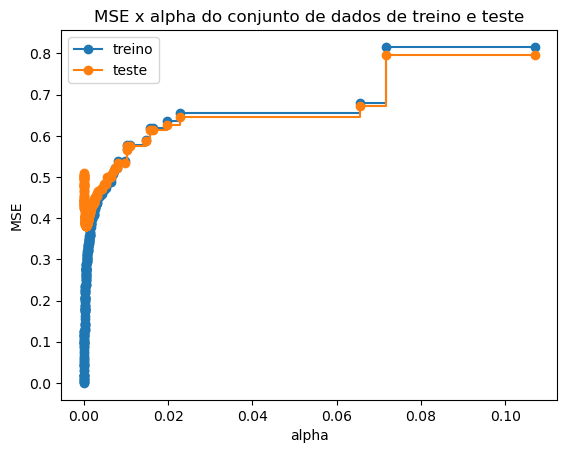

In [19]:
train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test  , clf.predict(X_test )) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

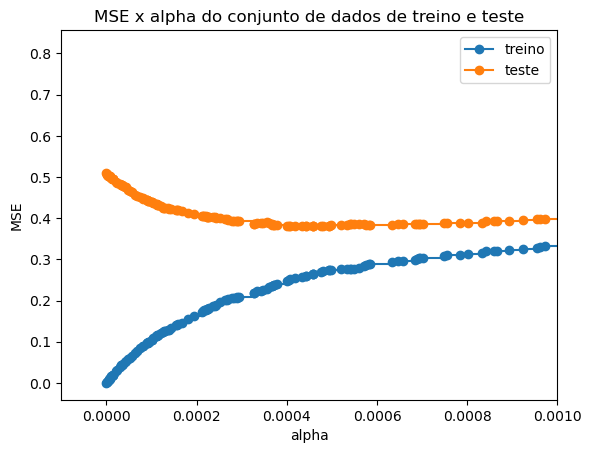

In [46]:
# vamo limitar o X para podermos ver melhor o MSE

fig, ax = plt.subplots()
# Definir o limite máximo do eixo X
max_x = 0.001
ax.set_xlim(-0.0001, max_x)
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
    drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
    drawstyle="steps-post")
ax.legend()
plt.show()

In [51]:
clf_alpha = DecisionTreeRegressor(random_state=0, ccp_alpha=0.0008)

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [52]:
clf_alpha.fit(X_train, y_train)

clf_alpha_R = clf_alpha.score(X_test, y_test)
clf_alpha_R

0.7068826453132622

### 7. Visualize esta árvore.

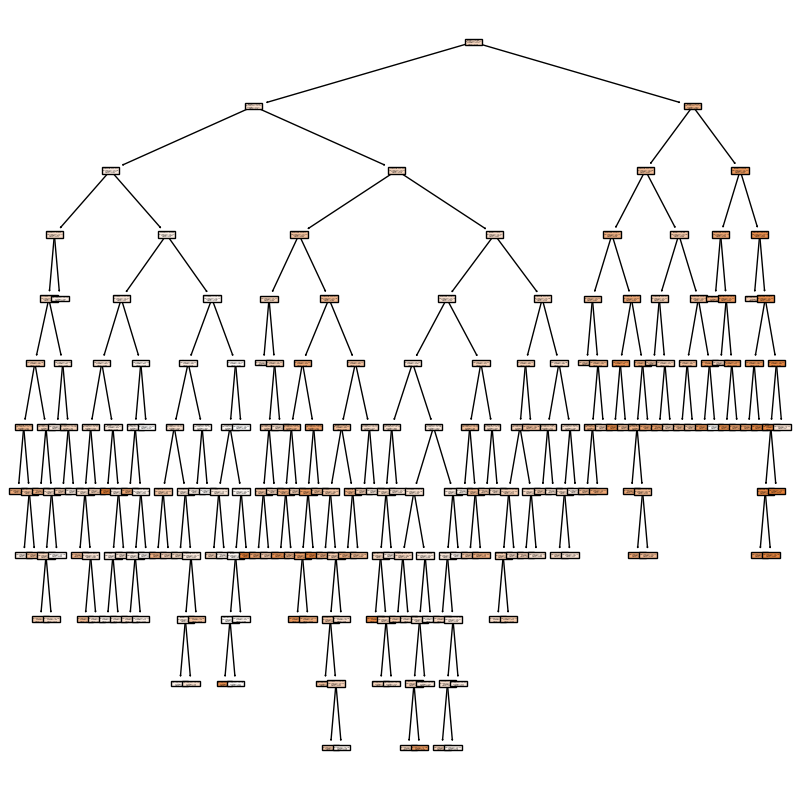

In [53]:
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(clf_alpha, 
                    feature_names=X.columns,  
                    filled=True) 